In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.tokenize import TreebankWordTokenizer
from nltk.stem.porter import PorterStemmer
from collections import OrderedDict, Counter

import langdetect
from langdetect import detect

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report
from sklearn.svm import LinearSVC

import nltk
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from nltk import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

C:\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_table("training_data.txt", header = None, names = ["Message"])

In [3]:
df.head()

,Message
0,can u do check in for me
1,score ke update nai milre apke
2,i need a hotel near symbiosis college
3,i have trying this app for first time
4,your app have some bugs


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55402 entries, 0 to 55401
Data columns (total 1 columns):
Message    55402 non-null object
dtypes: object(1)
memory usage: 216.5+ KB


In [5]:
df.shape

(55402, 1)

(-0.5, 399.5, 199.5, -0.5)

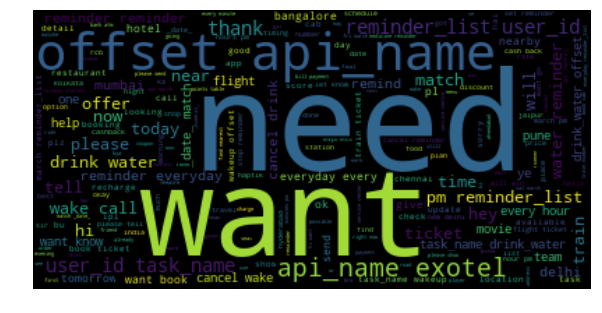

In [6]:
textall = " ".join(df.Message)

wordcloud = WordCloud().generate(textall)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [8]:
def load_words():
    with open('words.txt') as word_file:
        valid_words = set(word_file.read().lower().split())

    return valid_words
valid_dictionary = load_words()

def correct_spelling_rate(x,dictionary):
    sentence = x.split(" ")
    word_count = len(sentence)
    correct_count = 0
    for word in sentence:
        if word in dictionary:
            correct_count += 1
    return correct_count/word_count


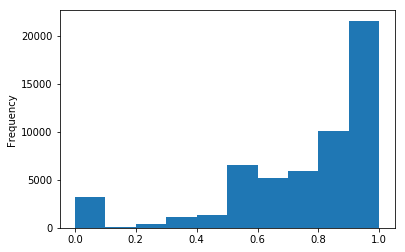

In [9]:
df['Correct Spelling Rate'] = df['Message'].apply(lambda x : correct_spelling_rate(x,valid_dictionary))
df['Correct Spelling Rate'].plot(kind='hist')

In [11]:
freq = pd.Series(' '.join(df['Message']).split()).value_counts()[:20]
freq

to          12239
i            9821
me           7371
for          7096
the          6868
in           4552
you          4483
is           4357
my           4159
can          3865
of           3749
want         3351
from         3252
a            3228
at           3141
reminder     2694
on           2671
u            2554
match        2396
any          2338
dtype: int64

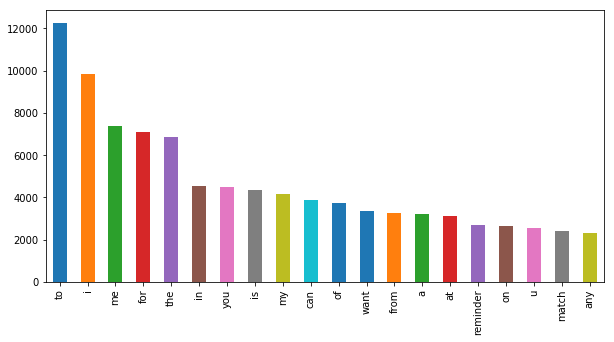

In [12]:
plt.figure(figsize=(10,5))
freq.plot.bar()

In [13]:
# Average length of messages
all_words = TreebankWordTokenizer().tokenize(df['Message'].sum())
avg_len = len(all_words)/df.shape[0]
print('Average length in words {}'.format(avg_len))

Average length in words 6.416501209342623


In [14]:
df['Message'] = df['Message'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Message'] = df['Message'].str.replace('[^\w\s]','')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55402 entries, 0 to 55401
Data columns (total 2 columns):
Message                  55402 non-null object
Correct Spelling Rate    55402 non-null float64
dtypes: float64(1), object(1)
memory usage: 649.3+ KB


In [15]:
for i,row in enumerate(df['Message']):
    try:
        language = detect(row)
    except:
        language = "error"
        print("This row throws and error:", row,i)
        df.drop(i,inplace= True)

This row throws and error: 7869 145
This row throws and error: 4327 571 906 151
This row throws and error: 4000 152
This row throws and error: 99 174
This row throws and error: 6665044792 266
This row throws and error:  319
This row throws and error: 12279 350
This row throws and error: 馃槖 409
This row throws and error: 2556556773 414
This row throws and error: 3282017 575
This row throws and error: 12301899 578
This row throws and error: 2128697376 608
This row throws and error:  650
This row throws and error: 11025 667
This row throws and error: 6162118695 1045
This row throws and error: 12301899 1253
This row throws and error:  1270
This row throws and error: 18406 1299
This row throws and error: 9162016 120000 1304
This row throws and error: 12301899 1537
This row throws and error: 9 52 1642
This row throws and error: 2808508245 1793
This row throws and error: 9989235469 1844
This row throws and error:  2031
This row throws and error:  2153
This row throws and error: 7788072206 218

This row throws and error: 4129234068 22060
This row throws and error: 1062017 22205
This row throws and error: 2428731753 22301
This row throws and error:  22403
This row throws and error: 4229325767 22441
This row throws and error:  22587
This row throws and error: 11212017 22795
This row throws and error:  22887
This row throws and error:  22960
This row throws and error: 12130 03022017 23090
This row throws and error: 3317 23284
This row throws and error: 8074235741 23432
This row throws and error: 3102017 23933
This row throws and error: 2428799255 23982
This row throws and error: 12301899 24090
This row throws and error: 2553875355 24095
This row throws and error: 12301899 24113
This row throws and error:  24192
This row throws and error: 4229108394 24239
This row throws and error: 12301899 24274
This row throws and error: 12482 24568
This row throws and error: 0 24586
This row throws and error: 12603 24635
This row throws and error: 12835 24716
This row throws and error: 32242 2

This row throws and error: 12301899 43925
This row throws and error: 22511 43983
This row throws and error: 12301899 44019
This row throws and error:  44326
This row throws and error:  44406
This row throws and error:  44567
This row throws and error: 4229361826 44584
This row throws and error: 2228264600 44688
This row throws and error: 6262185591 44865
This row throws and error:  45110
This row throws and error: 540 45180
This row throws and error:  45181
This row throws and error: 12295 12969 12615 45209
This row throws and error: 8356666113 45341
This row throws and error:  45463
This row throws and error: 6212017 45470
This row throws and error: 224181420819269 45796
This row throws and error: 81568112370 45822
This row throws and error: 8656540047 45840
This row throws and error: 432017 46163
This row throws and error: 8756737622 46164
This row throws and error: 3 46373
This row throws and error: 12301899 46428
This row throws and error: 5253 46442
This row throws and error: 1230

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54867 entries, 0 to 55401
Data columns (total 2 columns):
Message                  54867 non-null object
Correct Spelling Rate    54867 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [17]:
df['numerics'] = df['Message'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Message','numerics']].tail()

,Message,numerics
55397,i want to pay my bike insurance,0
55398,i want flour,0
55399,where can i buy case for htc desire 700,1
55400,what are the benefit provided by company to yo...,0
55401,what if i asked u a very serious questionperso...,0


In [18]:
d=df.iloc[:]
#print(d)
d['language']= d['Message'].apply(lambda x: detect (x))
print(d.head())
print(d.shape)

                                 Message  Correct Spelling Rate  numerics  \
0               can u do check in for me                    1.0         0   
1         score ke update nai milre apke                    0.5         0   
2  i need a hotel near symbiosis college                    1.0         0   
3  i have trying this app for first time                    1.0         0   
4                your app have some bugs                    1.0         0   

  language  
0       en  
1       ro  
2       en  
3       en  
4       no  
(54867, 4)


In [19]:
d['language'].value_counts()

en    38042
it     1563
so     1431
id     1156
cy     1070
da     1051
af      954
tl      900
sw      790
fr      789
no      622
et      613
ro      584
ca      584
nl      567
fi      504
sv      440
pt      400
sq      363
sk      309
hr      301
tr      281
sl      278
es      263
pl      255
lv      165
de      152
lt      125
vi       92
cs       91
hu       62
hi       47
mr        6
ne        5
ta        4
te        3
gu        1
el        1
bg        1
ml        1
ur        1
Name: language, dtype: int64

In [20]:
lang = pd.Series([d['language'].value_counts().iloc[0], d['language'].value_counts().iloc[1:].sum()], index=['English', 'Others'])
lang

English    38042
Others     16825
dtype: int64

(-1.1186130288377187,
 1.1606797067412769,
 -1.1146962512744645,
 1.1996473103804792)

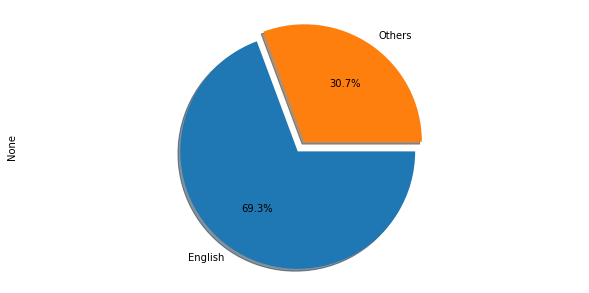

In [21]:
plt.figure(figsize=(10,5))
lang.plot.pie(labels = ['English', 'Others'], explode=(0, 0.1), shadow = True, autopct='%1.1f%%', counterclock = False)
plt.axis('equal')

In [23]:
data_en = d[d['language'] == 'en']
data_en = data_en.drop(columns = 'language', axis = 1)
print(data_en.head())
print(data_en.shape)

                                        Message  Correct Spelling Rate  \
0                      can u do check in for me                  1.000   
2         i need a hotel near symbiosis college                  1.000   
3         i have trying this app for first time                  1.000   
5                               any nearest atm                  1.000   
7  is their any nearest rapair services of cars                  0.875   

   numerics  
0         0  
2         0  
3         0  
5         0  
7         0  
(38042, 3)


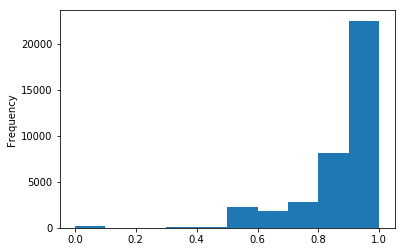

In [24]:
data_en['Correct Spelling Rate'] = data_en['Message'].apply(lambda x : correct_spelling_rate(x,valid_dictionary))
data_en['Correct Spelling Rate'].plot(kind='hist')

In [26]:

stop = stopwords.words('english')
data_en['stopword'] = data_en['Message'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data_en.head()

,Message,Correct Spelling Rate,numerics,stopword
0,can u do check in for me,1.000,0,u check
2,i need a hotel near symbiosis college,1.000,0,need hotel near symbiosis college
3,i have trying this app for first time,1.000,0,trying app first time
5,any nearest atm,1.000,0,nearest atm
7,is their any nearest rapair services of cars,0.875,0,nearest rapair services cars


In [27]:
freq = pd.Series(' '.join(data_en['stopword']).split()).value_counts()[:20]
freq

want             2935
please           2465
reminder         2435
match            2120
u                1973
cancel           1755
would            1579
train            1574
like             1541
need             1497
call             1317
know             1317
pm               1278
api_name         1239
offset           1239
user_id          1239
exotel           1239
task_name        1232
reminder_list    1232
book             1228
dtype: int64

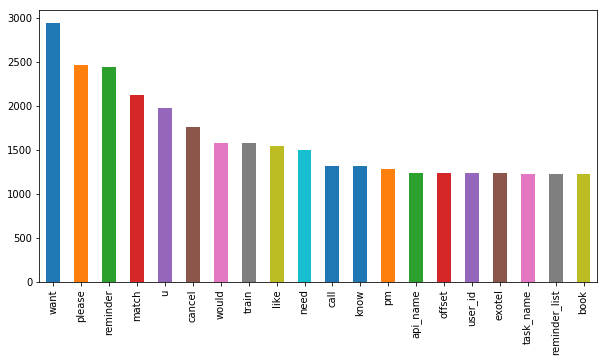

In [28]:
plt.figure(figsize=(10,5))
freq.plot.bar()

In [29]:
st = PorterStemmer()
data_en['Message']= data_en['Message'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [31]:
from textblob import Word
data_en['Message'] = data_en['Message'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [32]:
import textblob
from textblob import TextBlob
TextBlob(data_en['Message'][0]).ngrams(2)

[WordList(['can', 'u']),
 WordList(['u', 'do']),
 WordList(['do', 'check']),
 WordList(['check', 'in']),
 WordList(['in', 'for']),
 WordList(['for', 'me'])]

(-0.5, 399.5, 199.5, -0.5)

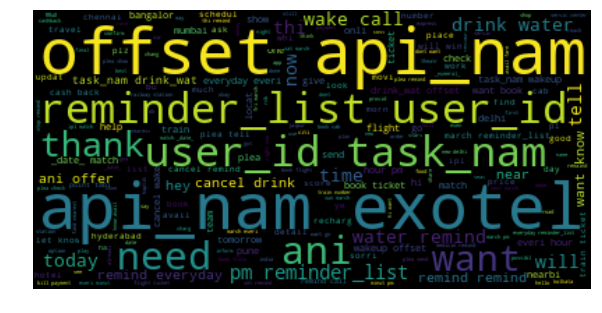

In [33]:
textall = " ".join(data_en.Message)

wordcloud = WordCloud().generate(textall)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [34]:
data_en.shape

(38042, 4)

In [35]:
def is_category(x, category):
    for q in category or q in TextBlob(category).ngrams(2):
        if q in x:
            return 1 
    return 0

In [37]:
ques=['how','what','when','who','why','which','can u','status','know','check']
data_en['Question'] = data_en['Message'].apply(lambda x : is_category(x,ques))

req=['want','need','pleas','may i','plz']
data_en['Request'] = data_en['Message'].apply(lambda x : is_category(x,req))

nearby=['near','around','close to','far', 'nearest']
data_en['Nearby'] = data_en['Message'].apply(lambda x : is_category(x,nearby))

flights = ['flight', 'plane','airway','air ticket']
data_en['Flights'] = data_en['Message'].apply(lambda x : is_category(x,flights))

trains = ['train', 'rail','platform','berth','express','tatkal','pnr']
data_en['Trains'] = data_en['Message'].apply(lambda x : is_category(x,trains))

cabs = ['cab', 'taxi', 'auto', 'rick']
data_en['Cabs'] = data_en['Message'].apply(lambda x : is_category(x,cabs))

recharge = ['recharg','payment','postpaid','prepaid','offer']
data_en['Recharge'] = data_en['Message'].apply(lambda x : is_category(x,recharge))

remind = ['remind','alarm','reminder_list','to do','api_name','user_id','task_name','offset']
data_en['Reminder'] = data_en['Message'].apply(lambda x : is_category(x,remind))

#def is_recharge(x):
  #  reg = re.compile('\s((\d+?\s?[Rr]s)|([Rr]s\s?\d+))\s')
  #  guess_words = ['recharge','₹','airtel','vodafone','jio','reliance','idea','docomo','bsnl','mtnl','dth']
  #  if reg.match(x):
  #      return 1
   # elif any(guess in x for guess in guess_words):
   #     return 1
   # else:
      #  return 0

#data_en['Recharge'] = data_en['X'].apply(is_recharge)

In [38]:
data_en.shape

(38042, 12)

In [39]:
data_en.head()

,Message,Correct Spelling Rate,numerics,stopword,Question,Request,Nearby,Flights,Trains,Cabs,Recharge,Reminder
0,can u do check in for me,1.000,0,u check,1,0,0,0,0,0,0,0
2,i need a hotel near symbiosi colleg,1.000,0,need hotel near symbiosis college,0,1,1,0,0,0,0,0
3,i have tri thi app for first time,1.000,0,trying app first time,0,0,0,0,0,0,0,0
5,ani nearest atm,1.000,0,nearest atm,0,0,1,0,0,0,0,0
7,is their ani nearest rapair servic of car,0.875,0,nearest rapair services cars,0,0,1,0,0,0,0,0


In [41]:
data_en['word_count'] = data_en['Message'].apply(lambda x: len(str(x).split(" ")))

data_en = data_en[data_en['word_count'] > 1]
data_en.shape

(37581, 13)

In [42]:
data_en = data_en.drop(columns = 'stopword')
print(data_en.head())

                                     Message  Correct Spelling Rate  numerics  \
0                   can u do check in for me                  1.000         0   
2        i need a hotel near symbiosi colleg                  1.000         0   
3          i have tri thi app for first time                  1.000         0   
5                            ani nearest atm                  1.000         0   
7  is their ani nearest rapair servic of car                  0.875         0   

   Question  Request  Nearby  Flights  Trains  Cabs  Recharge  Reminder  \
0         1        0       0        0       0     0         0         0   
2         0        1       1        0       0     0         0         0   
3         0        0       0        0       0     0         0         0   
5         0        0       1        0       0     0         0         0   
7         0        0       1        0       0     0         0         0   

   word_count  
0           7  
2           7  
3           8 

In [43]:
len(data_en)

37581

In [44]:
print(data_en['Question'].value_counts())
print(data_en['Request'].value_counts())
print(data_en['Nearby'].value_counts())
print(data_en['Reminder'].value_counts())
print(data_en['Flights'].value_counts())
print(data_en['Trains'].value_counts())
print(data_en['Cabs'].value_counts())
print(data_en['Recharge'].value_counts())

0    28550
1     9031
Name: Question, dtype: int64
0    32415
1     5166
Name: Request, dtype: int64
0    35155
1     2426
Name: Nearby, dtype: int64
0    33344
1     4237
Name: Reminder, dtype: int64
0    36296
1     1285
Name: Flights, dtype: int64
0    35193
1     2388
Name: Trains, dtype: int64
0    36874
1      707
Name: Cabs, dtype: int64
0    35608
1     1973
Name: Recharge, dtype: int64


Text(0.5,0,'0    28550\n1     9031\nName: Question, dtype: int64')

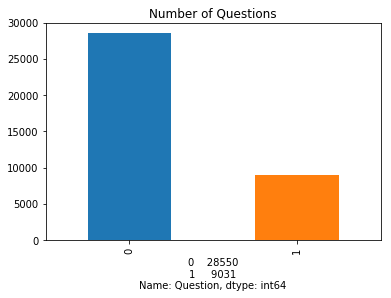

In [48]:
data_en['Question'].value_counts().plot.bar()
plt.title("Number of Questions")
plt.xlabel(data_en['Question'].value_counts())


Text(0.5,0,'0    32415\n1     5166\nName: Request, dtype: int64')

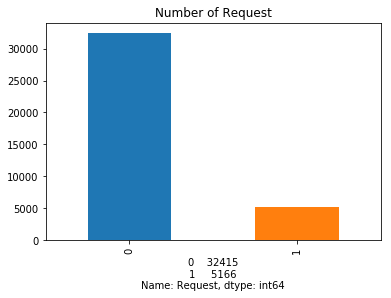

In [49]:
data_en['Request'].value_counts().plot.bar()
plt.title("Number of Request")
plt.xlabel(data_en['Request'].value_counts())

In [50]:
cat = [data_en['Question'].value_counts()[1]/len(data_en) * 100, 
       data_en['Request'].value_counts()[1]/len(data_en) * 100, 
       data_en['Nearby'].value_counts()[1]/len(data_en) * 100, 
       data_en['Reminder'].value_counts()[1]/len(data_en) * 100, 
       data_en['Flights'].value_counts()[1]/len(data_en) * 100, 
       data_en['Trains'].value_counts()[1]/len(data_en) * 100, 
       data_en['Cabs'].value_counts()[1]/len(data_en) * 100, 
       data_en['Recharge'].value_counts()[1]/len(data_en) * 100]

index = ['Question', 'Request', 'Nearby', 'Reminder', 'Flights', 'Trains', 'Cabs', 'Recharge']

In [51]:
category = pd.Series(cat , index = index)
category

Question    24.030760
Request     13.746308
Nearby       6.455390
Reminder    11.274314
Flights      3.419281
Trains       6.354275
Cabs         1.881270
Recharge     5.249993
dtype: float64

In [52]:
data_en['Outlier?'] = data_en['Nearby'] + data_en['Flights'] + data_en['Trains'] + data_en['Cabs'] + data_en['Recharge'] + data_en['Reminder']
#data_en.loc[data_en['Outliers'] > 0, 'Outliers'] = 1
data_en['Outlier?'] = np.where(data_en['Outlier?'] < 1, 1, 0)
data_en.head()

,Message,Correct Spelling Rate,numerics,Question,Request,Nearby,Flights,Trains,Cabs,Recharge,Reminder,word_count,Outlier?
0,can u do check in for me,1.000,0,1,0,0,0,0,0,0,0,7,1
2,i need a hotel near symbiosi colleg,1.000,0,0,1,1,0,0,0,0,0,7,0
3,i have tri thi app for first time,1.000,0,0,0,0,0,0,0,0,0,8,1
5,ani nearest atm,1.000,0,0,0,1,0,0,0,0,0,3,0
7,is their ani nearest rapair servic of car,0.875,0,0,0,1,0,0,0,0,0,8,0


In [53]:
data_en['Outlier?'].value_counts()

1    25329
0    12252
Name: Outlier?, dtype: int64

In [54]:
for cat in ['Question', 'Request']:
    print(pd.crosstab(data_en['Outlier?'], data_en[cat]))
    print("=================================")

Question      0     1
Outlier?             
0          9791  2461
1         18759  6570
Request       0     1
Outlier?             
0         10360  1892
1         22055  3274


In [55]:
evaluation_data = pd.read_csv("eval_data.csv")
evaluation_data['Outlier?'] = np.where(evaluation_data['Outlier?'] == True, 1, 0)
evaluation_data.head()


,Message,Outlier?
0,i want to buy mobile,1
1,hey i want to buy headphones,1
2,can you please guide me about share market,1
3,then tell me the best and safest way to root m...,1
4,camera nt working,1


In [56]:
X_train, X_test, y_train, y_test = train_test_split(data_en['Message'], data_en['Outlier?'], test_size = 0.3, random_state = 0)
X_eval = evaluation_data['Message']
y_eval = evaluation_data['Outlier?']

In [57]:
# initialize count vectorizer
count_vectorizer = CountVectorizer()

# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3))

In [58]:
# fit and transform with count vectorizer
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
X_eval_count = count_vectorizer.transform(X_eval)

In [59]:
# fit and transform with tfidf vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_eval_tfidf = tfidf_vectorizer.transform(X_eval)

In [60]:
# Multinomial Naive Bayes

# initialize multinomial naive bayes
nb_1 = MultinomialNB()
nb_2 = MultinomialNB()

In [61]:
# fit on count vectorizer training data
nb_1.fit(X_train_count, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
# fit on tfidf vectorizer training data
nb_2.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
# accuracy with count vectorizer
acc_count_nb = accuracy_score(nb_1.predict(X_test_count), y_test)
print("Count Vectorizer Accuracy: ", acc_count_nb)

Count Vectorizer Accuracy:  0.939689578713969


In [64]:
acc_count_nb = accuracy_score(nb_1.predict(X_eval_count), y_eval)
print("Count Vectorizer Accuracy - Evaluation Set: ", acc_count_nb)

Count Vectorizer Accuracy - Evaluation Set:  0.6158574062692072


In [65]:
# accuracy with tfidf vectorizer
acc_tfidf_nb = accuracy_score(nb_2.predict(X_test_tfidf), y_test)
print("TFIDF Vectorizer Accuracy: ", acc_tfidf_nb)

TFIDF Vectorizer Accuracy:  0.9184035476718404


In [66]:
acc_tfidf_nb = accuracy_score(nb_2.predict(X_eval_tfidf), y_eval)
print("Count Vectorizer Accuracy - Evaluation Set: ", acc_tfidf_nb)

Count Vectorizer Accuracy - Evaluation Set:  0.5918869084204057


In [67]:
model = OneVsRestClassifier(LinearSVC())

model.fit(X_train_count, y_train)
y_pred = model.predict(X_test_count)
        
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [68]:
print("OneVsRestClassifier Accuracy: ", acc_count_nb)
print(report)

OneVsRestClassifier Accuracy:  0.6158574062692072
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      3754
          1       0.99      1.00      1.00      7521

avg / total       0.99      0.99      0.99     11275



In [69]:
y_pred = model.predict(X_eval_count)
        
accuracy = accuracy_score(y_eval, y_pred)
report = classification_report(y_eval, y_pred)

In [70]:
print("OneVsRestClassifier Accuracy: ", acc_count_nb)
print(report)

OneVsRestClassifier Accuracy:  0.6158574062692072
             precision    recall  f1-score   support

          0       0.87      0.20      0.32       801
          1       0.56      0.97      0.71       826

avg / total       0.71      0.59      0.52      1627



In [71]:
model = DecisionTreeClassifier(random_state=7)

model.fit(X_train_count, y_train)
y_pred = model.predict(X_test_count)
        
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [72]:
print("DecisionTreeClassifier Accuracy: ", acc_count_nb)
print(report)

DecisionTreeClassifier Accuracy:  0.6158574062692072
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      3754
          1       0.99      1.00      1.00      7521

avg / total       1.00      1.00      1.00     11275



In [73]:
y_pred = model.predict(X_eval_count)
        
accuracy = accuracy_score(y_eval, y_pred)
report = classification_report(y_eval, y_pred)

print("DecisionTreeClassifier Accuracy: ", acc_count_nb)
print(report)

DecisionTreeClassifier Accuracy:  0.6158574062692072
             precision    recall  f1-score   support

          0       0.87      0.20      0.32       801
          1       0.56      0.97      0.71       826

avg / total       0.71      0.59      0.52      1627



In [74]:
    model = RandomForestClassifier(n_estimators=100, random_state=7)

    model.fit(X_train_count, y_train)
    y_pred = model.predict(X_test_count)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

In [75]:
print("RandomForestClassifier Accuracy: ", acc_count_nb)
print(report)

RandomForestClassifier Accuracy:  0.6158574062692072
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      3754
          1       0.99      1.00      0.99      7521

avg / total       0.99      0.99      0.99     11275



In [76]:
y_pred = model.predict(X_eval_count)
        
accuracy = accuracy_score(y_eval, y_pred)
report = classification_report(y_eval, y_pred)

print("DecisionTreeClassifier Accuracy: ", acc_count_nb)
print(report)

DecisionTreeClassifier Accuracy:  0.6158574062692072
             precision    recall  f1-score   support

          0       0.88      0.20      0.32       801
          1       0.56      0.97      0.71       826

avg / total       0.72      0.59      0.52      1627



In [ ]:
#Parameter grid
parameter_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Code starts here

clf = RandomForestClassifier(random_state = 0)
grid_search = GridSearchCV(estimator = clf, param_grid = parameter_grid)
grid_search.fit(X_train_count, y_train)
score_gs = grid_search.score(X_test_count, y_test)

print(score_gs)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# initialize logistic regression
logreg_1 = OneVsRestClassifier(LogisticRegression(random_state=10))
logreg_2 = OneVsRestClassifier(LogisticRegression(random_state=10))

In [ ]:
# fit on count vectorizer training data
logreg_1.fit(X_train_count, y_train)

# fit on tfidf vectorizer training data
logreg_2.fit(X_train_tfidf, y_train)

In [ ]:
# accuracy with count vectorizer
acc_count_logreg = accuracy_score(logreg_1.predict(X_test_count), y_test)
print("Count Vectorizer Accuracy: ", acc_count_logreg)

# accuracy with tfidf vectorizer
acc_tfidf_logreg = accuracy_score(logreg_2.predict(X_test_tfidf), y_test)
print("TFIDF Vectorizer Accuracy: ", acc_tfidf_logreg)

acc_count_logreg = accuracy_score(logreg_1.predict(X_eval_count), y_eval)
print("Count Vectorizer Accuracy: ", acc_count_logreg)
acc_tfidf_logreg = accuracy_score(logreg_2.predict(X_eval_tfidf), y_eval)
print("TFIDF Vectorizer Accuracy: ", acc_tfidf_logreg)